In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [159]:
class HopfieldNet:
    def __init__(self, N, M):
        self.N = N
        self.M = M
        self.W = np.zeros((N, N))
    
    def F(self, x):
        x[x >= 0] = 1
        x[x < 0] = -1
        return x

    def learn(self, train_data):
        for x in train_data:
            self.W += x @ x.T
        self.W = 1/self.N * self.W
        for i in range(self.N):
            self.W[i][i] = 0

    def predict(self, x):
        t1 = self.F(self.W @ x)
        for i in range(20):
            t1 = self.F(self.W @ t1)
        return t1
        


In [160]:
hn = HopfieldNet(36, 3)

In [161]:
x1 = np.array([
    [-1,1,1,1,1,-1],
    [-1,1,-1,-1,1,-1],
    [-1,1,-1,-1,1,-1],
    [-1,1,-1,-1,1,-1],
    [1,1,1,1,1,1],
    [1,-1,-1,-1,-1,1],
])
x2 = np.array([
    [-1,1,1,1,1,-1],
    [-1,1,-1,-1,-1,-1],
    [-1,1,-1,-1,-1,-1],
    [-1,1,1,1,1,-1],
    [-1,1,-1,-1,1,-1],
    [-1,1,1,1,1,-1],
])
x3 = np.array([
    [-1,1,-1,-1,1,-1],
    [-1,1,-1,1,-1,-1],
    [-1,1,1,-1,-1,-1],
    [-1,1,-1,1,-1,-1],
    [-1,1,-1,-1,1,-1],
    [-1,1,-1,-1,1,-1],
])

In [162]:
x1n = np.array([
    [1,1,1,1,1,-1],
    [1,1,-1,-1,1,-1],
    [-1,-1,-1,-1,1,-1],
    [-1,1,-1,-1,1,-1],
    [1,1,1,1,1,1],
    [1,-1,1,-1,-1,1],
])
x2n = np.array([
    [-1,1,1,1,1,-1],
    [-1,1,-1,1,-1,-1],
    [-1,1,-1,1,-1,-1],
    [1,-1,1,1,1,-1],
    [-1,1,-1,-1,1,-1],
    [-1,1,1,-1,1,-1],
])
x3n = np.array([
    [-1,1,-1,-1,-1,-1],
    [-1,1,-1,1,-1,-1],
    [-1,1,1,-1,-1,1],
    [-1,1,-1,1,-1,-1],
    [-1,1,1,-1,1,-1],
    [-1,1,1,-1,1,-1],
])

### Plot data

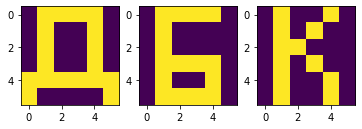

In [163]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(x1)
ax2.imshow(x2)
ax3.imshow(x3)

### Plot noisy data

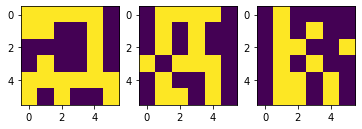

In [164]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(x1n)
ax2.imshow(x2n)
ax3.imshow(x3n)

### Train

In [165]:
train_data = [x.reshape(36,1) for x in [x1, x2, x3]]

In [166]:
hn.learn(train_data)

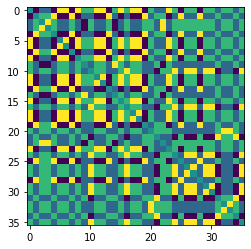

In [167]:
plt.imshow(hn.W)

### Check for WX = X

In [168]:
temp = hn.F(hn.W @ x1f)

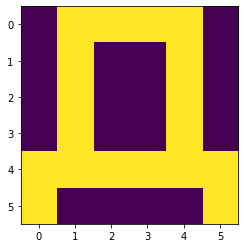

In [169]:
plt.imshow(temp.reshape(6,6))

### Predicting from noisy data

In [172]:
x1p = hn.predict(x1n.reshape(36, 1))
x2p = hn.predict(x2n.reshape(36, 1))
x3p = hn.predict(x3n.reshape(36, 1))

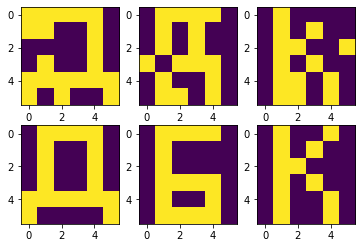

In [178]:
fig, axs = plt.subplots(2,3)
axs[0,0].imshow(x1n)
axs[0,1].imshow(x2n)
axs[0,2].imshow(x3n)
axs[1,0].imshow(x1p.reshape(6,6))
axs[1,1].imshow(x2p.reshape(6,6))
axs[1,2].imshow(x3p.reshape(6,6))